In [1]:

import numpy as np
from skimage.io import imread, imsave
from skimage.morphology import h_minima, watershed, local_minima
import scipy.ndimage as nd

from utils.display_utils import image_grid, image_gray, rebuild
import nibabel as nib

In [2]:
path_to_experiment = 'experiments/unet_res/'
img1 = 'top35_thresh_1.tif'
img2 = 'mid36_thresh_2.tif'
img3 = 'last29_thresh_3.tif'

In [3]:
neur1 = imread(path_to_experiment+img1)
neur2 = imread(path_to_experiment+img2)
neur3 = imread(path_to_experiment+img3)
# neur = np.rollaxis(neur, 0,3)
neur = np.concatenate((neur1,neur2,neur3), axis=0)
neur.shape

(100, 1024, 1024)

In [4]:
neur1.shape, neur2.shape, neur3.shape


((35, 1024, 1024), (36, 1024, 1024), (29, 1024, 1024))

In [6]:
imsave('experiments/unet_res/fullImage_infer.tif', neur)

In [9]:
neur.shape

(100, 1024, 1024)

In [10]:
res_= np.rollaxis(neur,0,3)
arr = np.eye(4)*[1,1,5,1]
cube = res_[:,:,:]
arr_im = nib.Nifti1Image(cube, arr)
file_string = path_to_experiment+'full'+'.nii.gz'
nib.save(arr_im, file_string)

In [4]:
# image_gray(neur[:,:,0])

In [76]:
'''
start here with  h_minima
invert the map when passing into min or watershed
'''
h_min, h_n = nd.label(h_minima(-neur,.01))

In [77]:
h_n

4236

In [71]:
water_s = watershed(-neur, h_min)

In [72]:
# np.unique(water_s)

<Figure size 432x288 with 0 Axes>

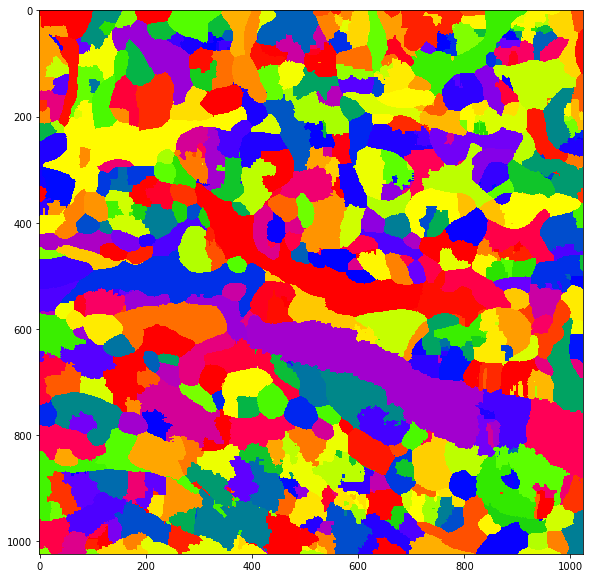

In [73]:
image_gray(water_s[:,:,0],10,'prism')

<Figure size 432x288 with 0 Axes>

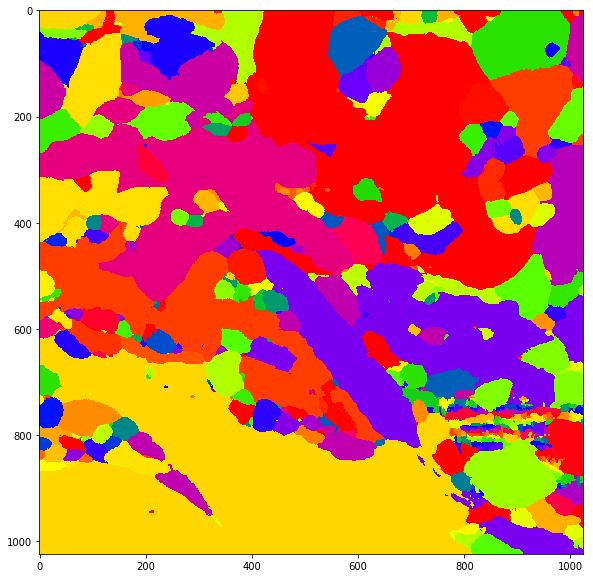

In [10]:
image_gray(water_s[:,:,15],10,'prism')

<Figure size 432x288 with 0 Axes>

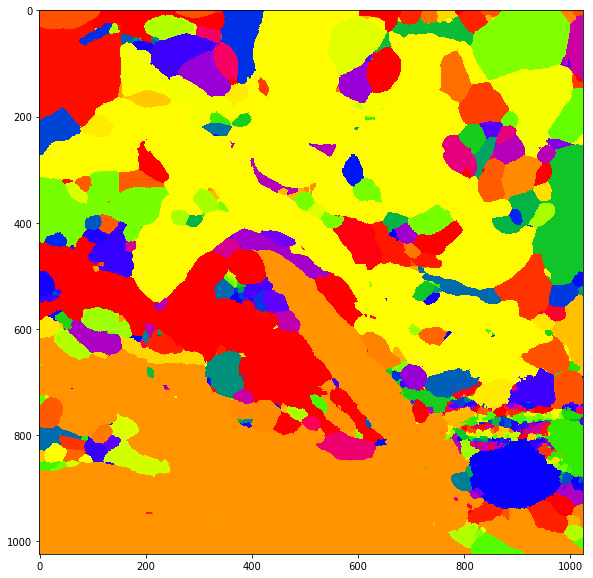

In [18]:
image_gray(water_s[:,:,15],10,'prism')

In [16]:
arr = np.eye(4)*[1,1,5,1]
cube = water_s
arr_im = nib.Nifti1Image(cube, arr)
file_string = path_to_experiment+'neuron_23_h_.nii.gz'
nib.save(arr_im, file_string)

<Figure size 432x288 with 0 Axes>

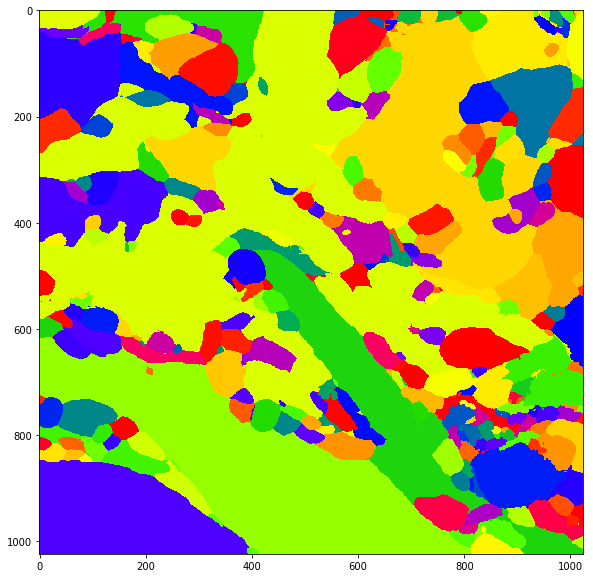

In [132]:
image_gray(water_s[:,:,15],10,'prism')

In [11]:
arr = np.eye(4)*[1,1,5,1]
cube = water_s
arr_im = nib.Nifti1Image(cube, arr)
file_string = path_to_experiment+'neuron_23_h_.nii.gz'
nib.save(arr_im, file_string)

<Figure size 432x288 with 0 Axes>

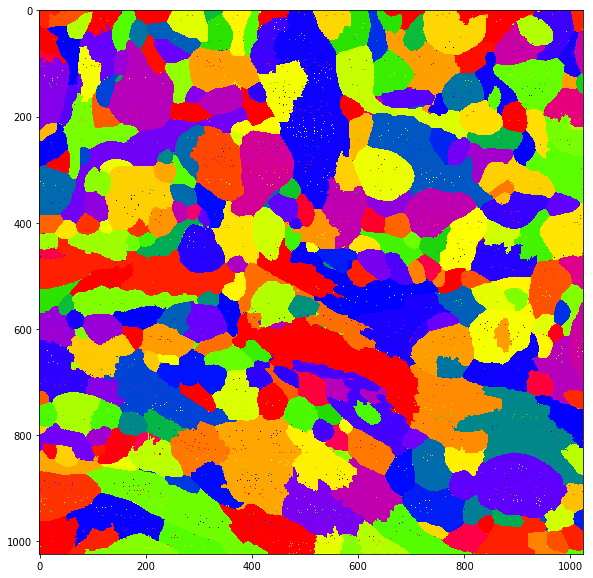

In [102]:
'''
local minima way over segments
'''
h_min, h_n = nd.label(local_minima(neur,.12))
wat = watershed(-neur, h_min)
image_gray(wat[:,:,0],10,'prism')

In [105]:
arr = np.eye(4)*[1,1,5,1]
cube = wat
arr_im = nib.Nifti1Image(cube, arr)
file_string = 'data/neuron_23_h_min.nii.gz'
nib.save(arr_im, file_string)